In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import DihedralAdherence
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lib.fit_model_on_multiple import fit_lr, predict_lr, fit_rf, plot_md_vs_rmsd, predict_rf
from pathlib import Path
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [28]:
from lib.utils import find_kdepeak, calc_da, get_phi_psi_dist


<Axes: ylabel='Density'>

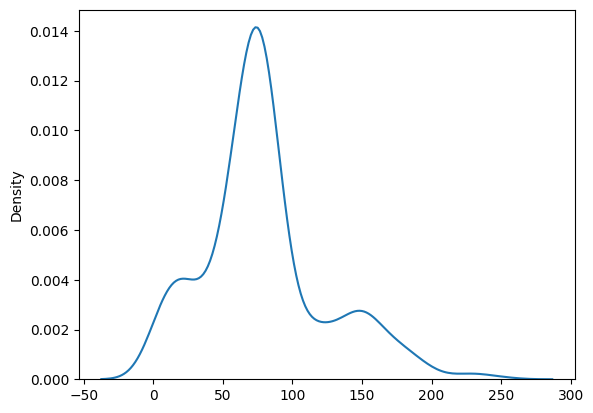

In [59]:
def calc_da_for_one(kdepeak, phi_psi):
    diff = lambda x1, x2: min(abs(x1 - x2), 360 - abs(x1 - x2))
    return np.sqrt(diff(phi_psi[0], kdepeak[0])**2 + diff(phi_psi[1], kdepeak[1])**2)

def calc_da(kdepeak, phi_psi_preds):
    def diff(x1, x2):
        d = np.abs(x1 - x2)
        return np.minimum(d, 360-d)
    return np.sqrt(diff(phi_psi_preds[:,0], kdepeak[0])**2 + diff(phi_psi_preds[:,1], kdepeak[1])**2)

phi_psi_dist, info = get_phi_psi_dist(da.queries, 'FQAYKTV')
kdepeak = find_kdepeak(phi_psi_dist, None)[['phi','psi']]
preds = da.phi_psi_predictions[da.phi_psi_predictions['seq_ctxt'] == 'FLTTTFT'][['phi','psi']]
sns.kdeplot(x=calc_da(kdepeak.values, preds.values))


Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 


Highest DA Differences:

|   pos |   pos_xray | seq_ctxt   |   da_pred |   da_xray |   da_diff |
|------:|-----------:|:-----------|----------:|----------:|----------:|
|   311 |        298 | LTTTFTP    |   262.277 |  26.2987  |  235.978  |
|   207 |        200 | FQAYKTV    |   201.186 |  17.3671  |  183.819  |
|   339 |        326 | LGADLMN    |   149.618 |   2.44246 |  147.176  |
|   340 |        327 | GADLMNP    |   174.968 |  31.5597  |  143.408  |
|   189 |        189 | MTETFKP    |   195.392 |  54.0102  |  141.382  |
|   164 |        164 | RPAFEAL    |   147.224 |  20.1562  |  127.068  |
|   310 |        297 | FLTTTFT    |   260.592 | 140.923   |  119.669  |
|   163 |        163 | FRPAFEA    |   239.75  | 121.347   |  118.402  |
|   208 |        201 | QAYKTVL    |   114.683 |  20.0497  |   94.6329 |
|    24 |         24 | AFSYGTV    |   135.49  |  58.526   |   76.9635 |


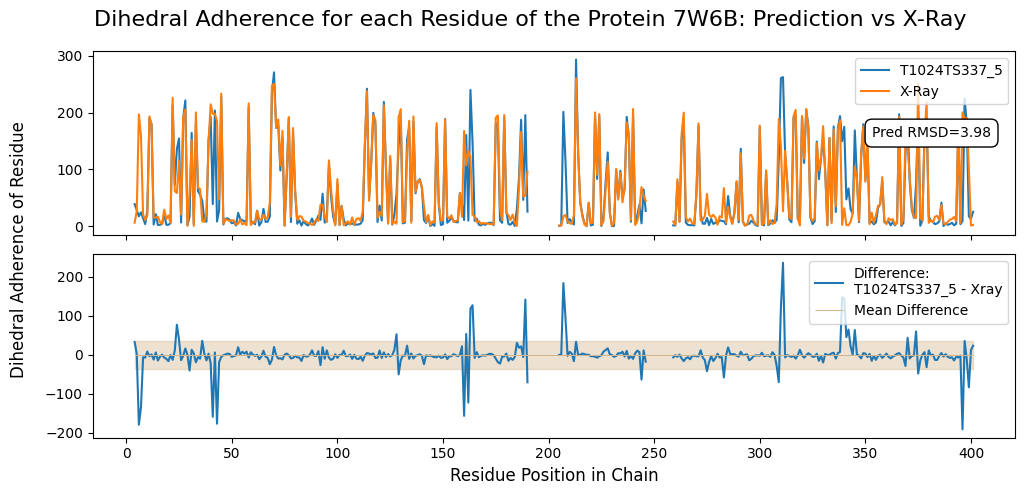

Residue T of Window FLTTTFT centered at 297 of FLTTTFT
	Win 4: TTTF - 1584 samples
	Win 5: LTTTF - 171 samples
	Win 6: LTTTFT - 62 samples
	Win 7: FLTTTFT - 0 samples
KDEpeak:	 (-130.00, 159.20)
X-ray[297]:	 (-128.38, 18.29), DA=140.92
TS337_5[310]:	 (-137.06, -101.30), DA=260.59
AlphaFold[310]:	 (-132.97, -0.74), DA=159.97
Other Predictions DA:
                 0
count  471.000000
mean   161.515129
std     56.698296
min      8.657521
25%    141.026525
50%    157.955120
75%    188.819795
max    420.314306


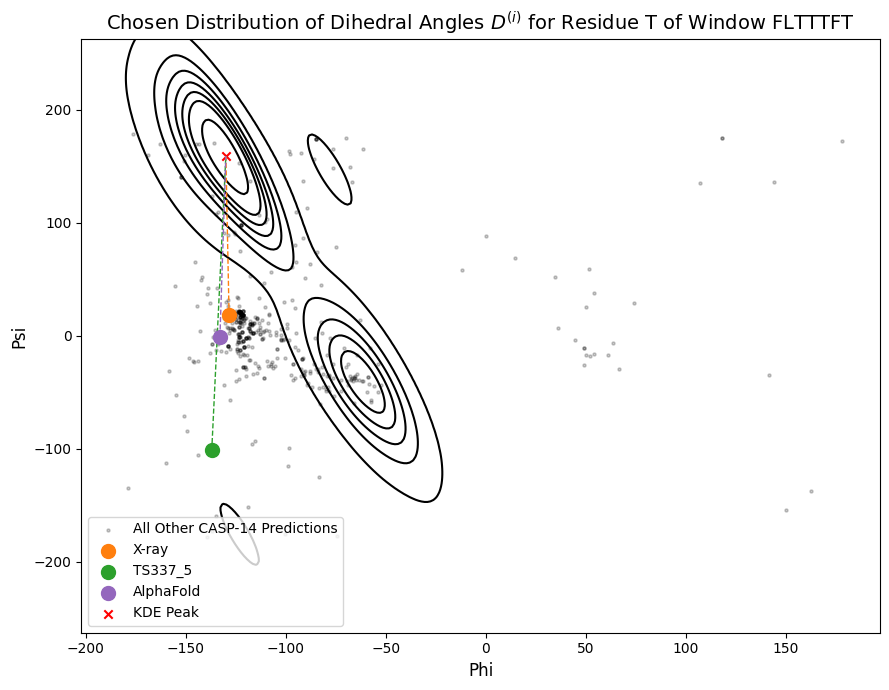

In [60]:
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'
casp_protein_id = 'T1024'   # 6ya2
da = DihedralAdherence(casp_protein_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
da.load_results_da()
both = da.plot_res_vs_da()
da.plot_da_for_seq('FLTTTFT')

In [3]:
WINDOW_SIZE = 5
WINDOW_SIZE_CONTEXT = 6
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

Results already exist
PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Results already exist
PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Results already exist
PDB: 7d2o
Structure exists: 'pdb/pdb7d2o.ent' 
Results already exist
PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
Results already exist
PDB: 7w6b
Structure exists: 'pdb/pdb7w6b.ent' 
Results already exist
PDB: 7abw
Structure exists: 'pdb/pdb7abw.ent' 
Results already exist
PDB: 6y4f
Structure exists: 'pdb/pdb6y4f.ent' 
Results already exist
PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
Results already exist
PDB: 6yj1
Structure exists: 'pdb/pdb6yj1.ent' 
Results already exist
PDB: 6ya2
Structure exists: 'pdb/pdb6ya2.ent' 
Model R-squared: 0.868748, Adj R-squared: 0.839520, p-value: 0.0


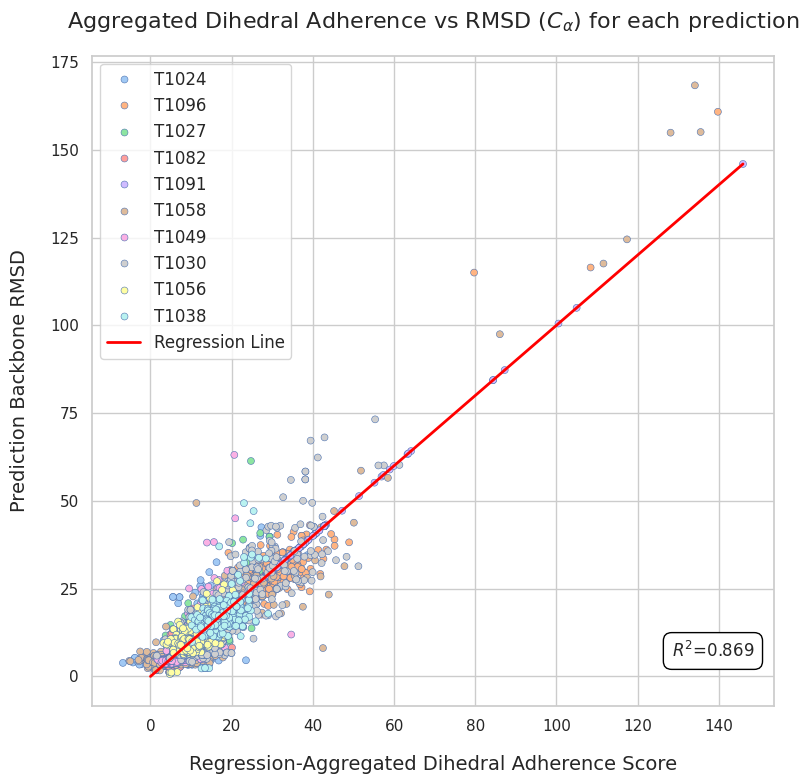

In [11]:
# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038'], 
    WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds)

Results already exist
PDB: 6uv6
Structure exists: 'pdb/pdb6uv6.ent' 
(170, 262)
(170, 2000)
Results already exist
PDB: 6vqp
Structure exists: 'pdb/pdb6vqp.ent' 
(165, 310)
(165, 2000)
Model R-squared: 0.868748, Adj R-squared: 0.839520, p-value: 0.0


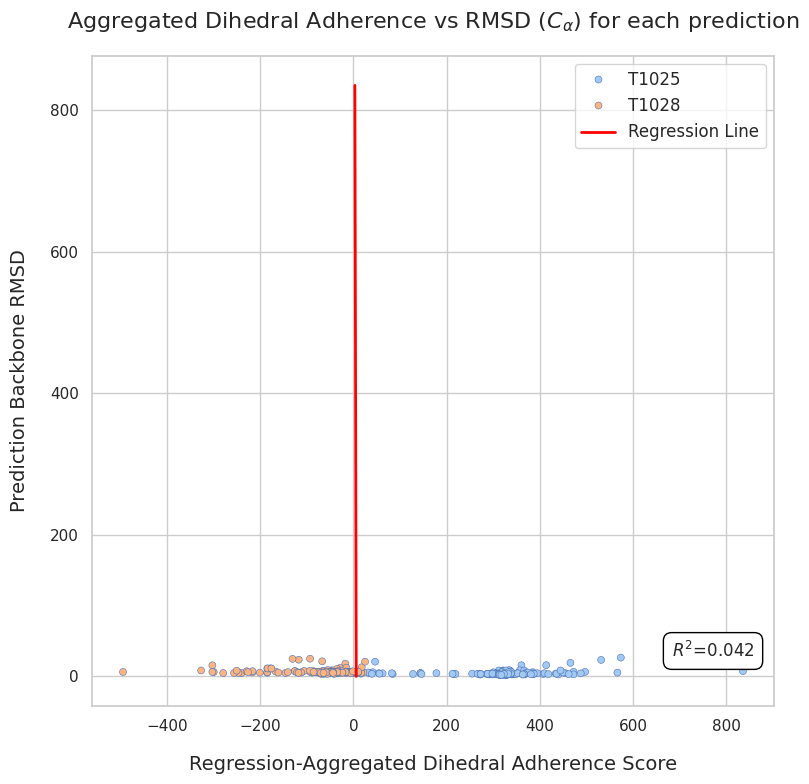

In [32]:
_, grouped_preds = predict_lr(
    model,
    ['T1025', 'T1028'],
    WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR,
    n_comp=2000
)
plot_md_vs_rmsd(grouped_preds)

Results already exist
PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
Results already exist
PDB: 6y4f
Structure exists: 'pdb/pdb6y4f.ent' 
Results already exist
PDB: 7d2o
Structure exists: 'pdb/pdb7d2o.ent' 
Results already exist
PDB: 6yj1
Structure exists: 'pdb/pdb6yj1.ent' 
Results already exist
PDB: 7abw
Structure exists: 'pdb/pdb7abw.ent' 
Results already exist
PDB: 7w6b
Structure exists: 'pdb/pdb7w6b.ent' 
Results already exist
PDB: 6vr4
Structure exists: 'pdb/pdb6vr4.ent' 
Results already exist
PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Results already exist
PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
Results already exist
PDB: 6uv6
Structure exists: 'pdb/pdb6uv6.ent' 
Results already exist
PDB: 6ya2
Structure exists: 'pdb/pdb6ya2.ent' 
Results already exist
PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Results already exist
PDB: 6vqp
Structure exists: 'pdb/pdb6vqp.ent' 


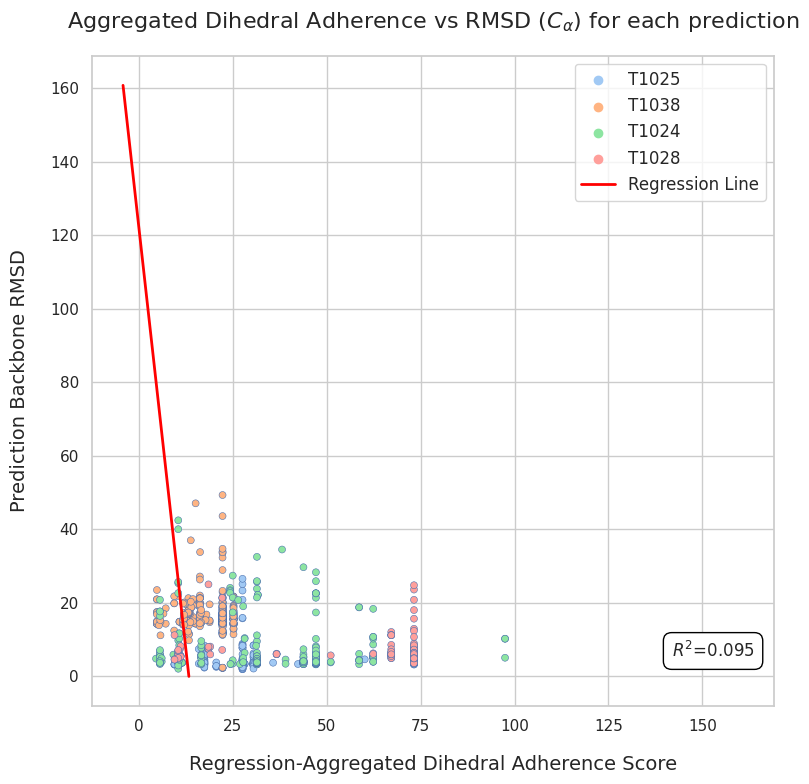

In [33]:
protein_ids = [f.name.split('_')[0] for f in Path(PROJECT_DIR).iterdir() if f.is_dir() and len(list(f.iterdir())) != 0]# protein_ids = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
train, test = train_test_split(protein_ids, test_size=0.3, random_state=42)
model, grouped_preds_train = fit_rf(train, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
grouped_preds = predict_rf(model, test, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
plot_md_vs_rmsd(grouped_preds)

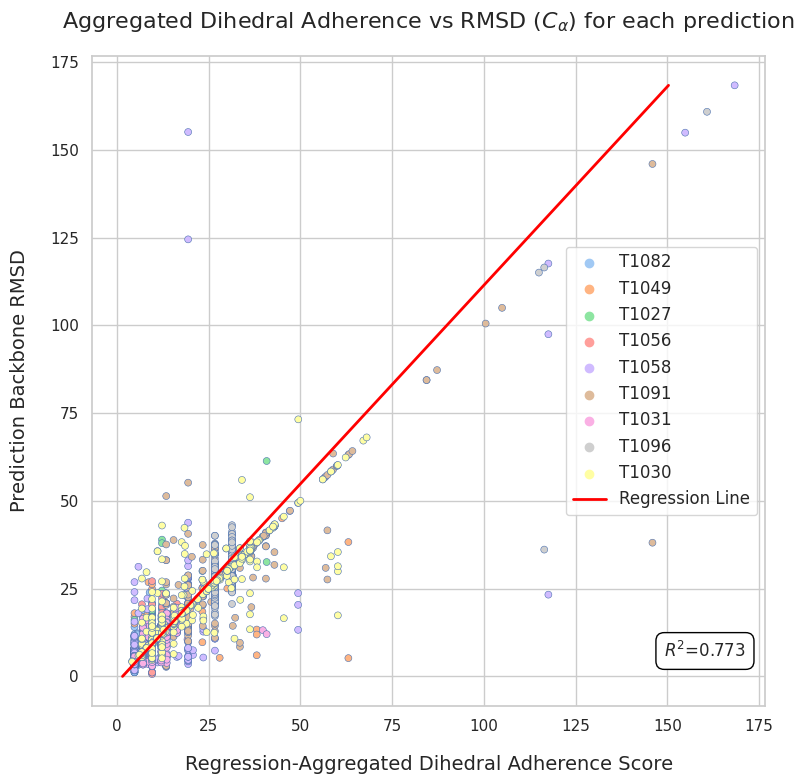

In [32]:
plot_md_vs_rmsd(grouped_preds_train)

ANN

In [62]:
import pickle
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [187]:
class Bruh(nn.Module):
    def __init__(self):
        super(Bruh, self).__init__()
        self.c = nn.Conv1d(1, 4, 3, stride=1)
        self.gp = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(4, 1)
    def forward(self, x):
        x = self.c(x)
        x = self.gp(x)
        x = x.squeeze()
        x = self.fc(x)
        return x

In [188]:
for protein_id in ['T1024', 'T1038']:
    X = pickle.load(open(f'./pkls/X-{protein_id}.pkl', 'rb'))
    y = pickle.load(open(f'./pkls/y-{protein_id}.pkl', 'rb'))
    X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    train_dataset = TensorDataset(X, y)
for protein_id in ['T1030', 'T1028']:
    X = pickle.load(open(f'./pkls/X-{protein_id}.pkl', 'rb'))
    y = pickle.load(open(f'./pkls/y-{protein_id}.pkl', 'rb'))
    X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    test_dataset = TensorDataset(X, y)

trainloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [189]:
model = Bruh()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

losses = []
test_losses = []
for epoch in range(25):
    losses_ = []
    for X,y in trainloader:
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses_.append(loss.item())
    losses.append(sum(losses_) / len(losses_))

    test_losses_ = []
    for X,y in testloader:
        y_pred = model(X)
        loss = criterion(y_pred, y)
        test_losses_.append(loss.item())
    test_losses.append(sum(test_losses_) / len(test_losses_))

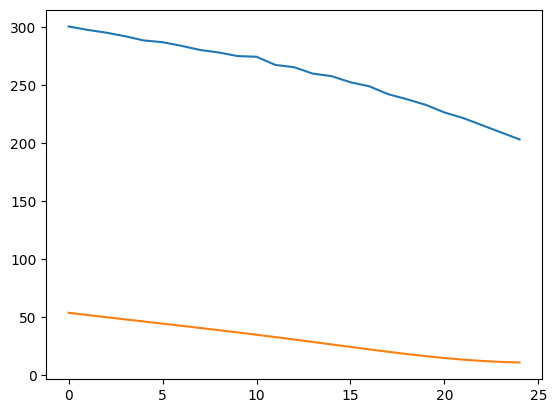

In [190]:
plt.plot(losses[:30])
plt.plot(test_losses[:30])

0.06081319817419232

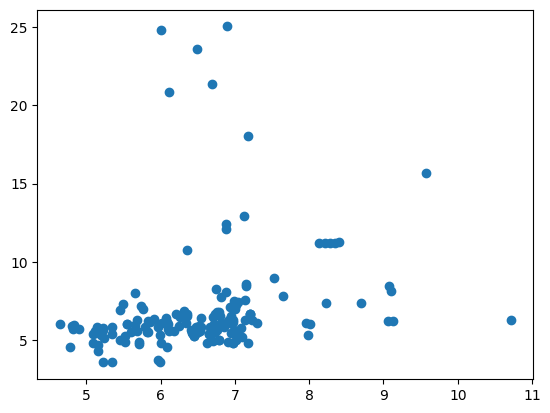

In [194]:
y_pred = model(test_dataset.tensors[0])
plt.scatter(y_pred.detach().numpy(), test_dataset.tensors[1].numpy())
from scipy.stats import linregress
linregress(y_pred.detach().numpy().squeeze(), test_dataset.tensors[1].numpy().squeeze()).rvalue**2